# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 쓴다.
    - 추상클래스 : 같은일을 하는데. 시스템이 다르거나 해서 구현을 조금씩 다르게 해야하는 경우, 어떤 기능을 해야해 라고 미리 정해놓은 것. -> 상속과 비슷!
    - 모델에 데이터를 제공하고 싶은데, 여러 설정을 해줘야해. 어디에는 메모리에, 어떤앤는 파일에 있는데 파일도 형식이 다다르니까 다양한 데이터 마다 전달하는 방법이 전부 달라져. (데이터가 어디에 있던 전달하는 것 자체는 같음, 읽어서 주는건 똑같은데 읽는 방법이 달라)
- 학습할 때 model.fit() 할때 설정을 데이터셋 api가 대신해줌. 학습, 평가 등을 할때 전달해줄 데이터셋을 미리 만들어 놓고 어떤식으로 전달(feeding) 할지를 해주는 것!
    - 예) X,Y값, epoch값, batch_size, validation_split 등

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업과 공급을 담당한다.    
- 이미지 데이터의 경우
    - 분산 파일시스템으로 부터 이미지를 모으는 작업, 
    - 이미지에 노이즈를 주거나 변형하는 작업, 
    - 배치 학습을 위해 무작위로 데이터를 선택하여 배치데이터를 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 세단계
1. 데이터셋 생성 : 원본데이터가 어디에 저장되어 있는지, 어떤 파일인지 에 따라 읽어드리는 방법이 달라서 여러 메소드가 있는 것-> 결국 데이터를 읽어서 데이터셋을 만드는 것은 맞음!
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. 데이터셋 변형: map(), filter(), batch() 등 메소드를 이용해 데이터 소스를 변형한다.
 - filter : 조건을 만족하는 것만 걸러내
 - map : 하나하나를 동일한 방식으로 변경하고 싶을 때(매개변수로 함수사용!)\
 - batch : 뱃치사이즈
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리한다.
- shuffle(크기): dataset의 원소들의 순서를 섞는다. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다. =>데이터가 너무너무 많으면 적게 주기도 한다.)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data를 꺼내준다.

In [1]:
import tensorflow as tf
import numpy as np

In [15]:
arr = np.arange(9) # 학습해야 할 데이터

#메모리에 저장된 nparray 배열을 이용해 데이터셋 객체 생성
dataset = tf.data.Dataset.from_tensor_slices(arr) #tensorflow의 api, dataset의 하위 개게 생성됨
# from_tensor_slices : 메소드

In [16]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [17]:
# 각 원소에 변환작업 데이터셋에 추가, dataset.map(변환함수) 사용!
dataset = dataset.map(lambda x:x**2) #제곱
#함수로도 가능
#def func(x):
#    return x**2

In [18]:
type(dataset) # 맵 데이터셋으로 바뀜

tensorflow.python.data.ops.dataset_ops.MapDataset

In [9]:
#2의 배수만 걸러내기
#dataset = dataset.filter(lambda x:x%2 == 0) 

In [19]:
#섞기
dataset = dataset.shuffle(9)
#shuffle(3): 3개만 랜덤하게 가져와서 쓸께
# 데이터 너무 많아서 메모리 부족시 일부만이라도 섞기 위해서
# 메모리만 충분하면 데이터 전체 갯수로 셔플 사용하는 것이 좋음

In [20]:
#batch :한번에 지정한 갯수만큼 데이터를 제공
dataset = dataset.batch(3)

In [21]:
for a in dataset:
    print(a)
    #break : 넣으면 한 배열만 보기

tf.Tensor([36 64  4], shape=(3,), dtype=int32)
tf.Tensor([ 0  1 25], shape=(3,), dtype=int32)
tf.Tensor([16  9 49], shape=(3,), dtype=int32)


In [22]:
# dataset 생성 2
x = np.arange(10)
y = np.arange(10,20)
x.shape, y.shape

((10,), (10,))

In [23]:
ds = tf.data.Dataset.from_tensor_slices((x,y))
# 배열 두가지로 생성시 튜플로 묶어서 줘야, 그리고 각 원소의 갯수가 같아야

In [24]:
for a in ds:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=6>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=7>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [26]:
ds2 = ds.map(lambda x,y : (x**2, y**3))
#def map_func(x,y): # 아까는 하나만 매개변수로 받았지만, 지금은 데이터가 두개 묶여져 있어서 변수 2개 선언
#    return x**2, y**3


In [27]:
for a in ds2:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)


In [28]:
ds3 = ds2.shuffle(10)

In [29]:
for a in ds3:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)


In [30]:
ds4 = ds3.batch(4)

In [31]:
for a in ds4:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 81, 49, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 6859, 4913, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25,  0,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 1000, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 4096])>)


In [32]:
for a in ds4.repeat(): #무한제공, 매개변수로 count제공시 그만큼만 반복
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 25,  1,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 3375, 1331, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  4, 81, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1728, 6859, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 25,  1, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 3375, 1331, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  0, 81, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1000, 6859, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1, 16, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 2744, 5832])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 64,  0,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 5832, 1000, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  1, 81, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1331, 6859, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 25, 36,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 3375, 4096, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 49, 64, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4913, 5832, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([9, 4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 1728])>)
(<tf.Tensor: shape=(4,), dtype=in

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25,  1, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 16,  0, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 2744, 1000, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  4,  1, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1728, 1331, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 25, 16, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 3375, 2744, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 25, 64,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 3375, 5832, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  9,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 2197, 1000, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  0,  1, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1000, 1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 81, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 6859, 2744, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 4913])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 49,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4913, 1000, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 81,  0, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 6859, 1000, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  1, 25, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1331, 3375, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25,  1, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 1331, 4913])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 25, 64,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 3375, 5832, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  9, 49,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2197, 4913, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 16, 36,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2744, 4096, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 16,  1, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2744, 1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 49,  4, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 4913, 1728, 6859])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  0,  9,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1000, 2197, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 64, 25,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 5832, 3375, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  9,  0, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 2197, 1000, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  1,  4, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1331, 1728, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 16, 49, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 2744, 4913, 4096])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  9, 49, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2197, 4913, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 1000, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25,  1, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  0, 36, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1000, 4096, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 36, 16, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4096, 2744, 6859])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  9, 16, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2197, 2744, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  4,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1728, 1000, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 49,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 4913, 1000, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 81,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 6859, 2197, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 49, 16,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 4913, 2744, 1000])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 36, 25, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4096, 3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  9, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2197, 2744, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25, 36, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 4096, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  1,  0, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1331, 1000, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25, 49, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 4913, 6859])>)
(<tf.Tensor: sh

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 16, 64,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2744, 5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 81, 36,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 6859, 4096, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 81, 36,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 6859, 4096, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  4, 64, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 1728, 5832, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  4, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1728, 2744, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  1, 81, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1331, 6859, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 36, 49, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4096, 4913, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([9, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 36, 16, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 4096, 2744, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  9, 81,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2197, 6859, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 49,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4913, 1000, 6859])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 49,  1, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4913, 1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 36,  4,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4096, 1728, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  0,  4, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1000, 1728, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 16,  1, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2744, 1331, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 3375])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 16, 81,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2744, 6859, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  4,  9,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1728, 2197, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25,  4, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 1728, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 16,  9, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2744, 2197, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 64,  9,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 5832, 2197, 1000])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  9, 25, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2197, 3375, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 25,  0, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 3375, 1000, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 64,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 5832, 2197, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 49, 25, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 4913, 3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  4, 64,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1728, 5832, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 16, 49,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2744, 4913, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  1,  0,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1331, 1000, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25, 64, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 5832, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 16, 49, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 2744, 4913, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 81,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 6859, 1000, 5832])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 2744, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  9, 36, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 2197, 4096, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  9,  1, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 2197, 1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 36, 49, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 4096, 4913, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  0, 36,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1000, 4096, 2197])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 16,  4, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2744, 1728, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 49,  0,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4913, 1000, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 16,  4, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2744, 1728, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64, 25,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 3375, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 64, 16, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 5832, 2744, 3375])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  1, 36,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1331, 4096, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 16, 49,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2744, 4913, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 64,  1, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 5832, 1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 36,  9,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4096, 2197, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  4, 36,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 1728, 4096, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 16, 64,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2744, 5832, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 49,  1, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 4913, 1331, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  9, 64, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2197, 5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 49,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4913, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 16, 36,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2744, 4096, 1728])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 81, 25, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 6859, 3375, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 36, 16,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 4096, 2744, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 81,  0, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 6859, 1000, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25,  1,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 1331, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 81,  0, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 6859, 1000, 4913])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  1, 49, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1331, 4913, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 36, 16,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 4096, 2744, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 25, 49, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 3375, 4913, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  4, 36,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1728, 4096, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25,  0,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 1000, 1331])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  9, 36, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2197, 4096, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 64,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 5832, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 36, 81,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4096, 6859, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 25, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 3375, 2744, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25, 36, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 4096, 2744])>)
(<tf.Tensor: sh

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 16,  9, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 2744, 2197, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  0, 36,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1000, 4096, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 36,  4, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 4096, 1728, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  1, 25, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1331, 3375, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 2744])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 81,  9, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 6859, 2197, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 64, 81,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 5832, 6859, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 49, 36,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4913, 4096, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 36, 64,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4096, 5832, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 49, 25, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 4913, 3375, 6859])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  9, 64,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2197, 5832, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 25, 81, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 3375, 6859, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  1, 49, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1331, 4913, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([9, 4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25,  1, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  0, 81,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1000, 6859, 1728])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 16, 64, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2744, 5832, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 36,  4, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 4096, 1728, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  1, 25, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1331, 3375, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 81, 49,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 6859, 4913, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 64,  4, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 5832, 1728, 6859])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  1, 16,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1331, 2744, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  4,  9, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1728, 2197, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 49,  9, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4913, 2197, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 36,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4096, 1000, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  1,  0,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1331, 1000, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  1,  4, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1331, 1728, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 36, 81, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4096, 6859, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  0,  9, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1000, 2197, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  1, 16, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1331, 2744, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 4096])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 81,  4, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 6859, 1728, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 16, 49, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2744, 4913, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 25,  1, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 3375, 1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  0, 36,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1000, 4096, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1, 64, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 5832, 2744])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 49, 81,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 4913, 6859, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 64,  9, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 5832, 2197, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 16, 36, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2744, 4096, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  9, 25,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2197, 3375, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  0, 49,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1000, 4913, 1331])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 64,  4, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 5832, 1728, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  0,  1, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1000, 1331, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 49, 36, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 4913, 4096, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  9, 64, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 2197, 5832, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 16,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2744, 1000, 6859])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  1,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1331, 1000, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 81, 25, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 6859, 3375, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 4, 1, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1728, 1331, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 49, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4913, 2744, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 25,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 3375, 1000, 6859])>)
(<tf.Tensor: sh

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 36, 49,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 4096, 4913, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 81,  9,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 6859, 2197, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 36,  9, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4096, 2197, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 81,  4,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 6859, 1728, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64, 25,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 3375, 1000])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  1,  9, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1331, 2197, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 81, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 6859, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 16, 36, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2744, 4096, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1,  4, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  1, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1331, 2744, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 81, 36, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 6859, 4096, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 49,  0, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4913, 1000, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 36, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 4096, 2744, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 81, 64,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 6859, 5832, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int3

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 64, 49,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 5832, 4913, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  9,  1, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 2197, 1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 49, 81, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 4913, 6859, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  1,  4,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  0, 49, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1000, 4913, 6859])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  1, 81, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1331, 6859, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  4,  0, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1728, 1000, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 64,  4, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 5832, 1728, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  9, 25, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2197, 3375, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 6859])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 16,  0, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2744, 1000, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  4, 81, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1728, 6859, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  4, 81, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1728, 6859, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  9, 16, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2197, 2744, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 16,  1,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2744, 1331, 1000])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 36, 64, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 4096, 5832, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 81,  9, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 6859, 2197, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 16, 25,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2744, 3375, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 36, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4096, 2744, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25, 49,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 4913, 1728])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  9,  1,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 2197, 1331, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  0, 49, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1000, 4913, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64, 49, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 4913, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  4,  1, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1728, 1331, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25, 49, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 4913, 4096])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 49, 81, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 4913, 6859, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 64, 16,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 5832, 2744, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  9, 36,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2197, 4096, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  4,  0, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1728, 1000, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 81,  0, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 6859, 1000, 3375])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  1,  9, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1331, 2197, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 49,  0, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4913, 1000, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  1,  9, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1331, 2197, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  0, 36, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1000, 4096, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 2197, 1331])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 36, 64,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4096, 5832, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  4,  9, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1728, 2197, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  0,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1000, 2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  4, 25, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1728, 3375, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 81, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 6859, 2744, 4913])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 36,  1, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4096, 1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  0,  9, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1000, 2197, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  4, 49,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1728, 4913, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  1, 16, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1331, 2744, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 2197])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 49,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4913, 2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25,  0, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 1000, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 16,  1,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2744, 1331, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  9, 81, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2197, 6859, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 4913])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 25,  4,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 3375, 1728, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 64, 49, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 5832, 4913, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([9, 1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  9, 81, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2197, 6859, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  4,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1728, 1000, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  4, 25, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1728, 3375, 5832])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  1, 64, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1331, 5832, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  0, 81, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1000, 6859, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 16,  1, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 2744, 1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  4,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1728, 1000, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 49, 81,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 4913, 6859, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 49, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4913, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 64,  0,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 5832, 1000, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  1, 36, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1331, 4096, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 25, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 3375, 2744, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 16, 49, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2744, 4913, 6859])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  1, 36, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1331, 4096, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  9, 49, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2197, 4913, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  4, 16, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1728, 2744, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  9, 81,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2197, 6859, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  1, 64,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1331, 5832, 1728])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 81,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 6859, 2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 64, 36, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 5832, 4096, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 16,  0, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2744, 1000, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  9, 36, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2197, 4096, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 16, 36,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2744, 4096, 1000])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  0, 81,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1000, 6859, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  4, 81,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1728, 6859, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 36, 16, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4096, 2744, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 16, 25,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2744, 3375, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  4,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1728, 1000, 5832])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  0, 16,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1000, 2744, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  1, 81, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1331, 6859, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 49,  9,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4913, 2197, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 16,  1, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2744, 1331, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1000])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 64, 25, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 5832, 3375, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  0, 81, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1000, 6859, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 64, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 5832, 2744, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 81,  0, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 6859, 1000, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 16,  1,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 2744, 1331, 1728])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 36, 49, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 4096, 4913, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  0, 64, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1000, 5832, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 81,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 6859, 2197, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64,  0,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 1000, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 81, 36, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 6859, 4096, 3375])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 36,  1,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4096, 1331, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  4, 81,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1728, 6859, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  4,  0, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 1728, 1000, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 16, 25, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 2744, 3375, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 49, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 4913, 2744, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 49, 81, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4913, 6859, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  0,  9, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1000, 2197, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25,  4, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 1728, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  9, 64, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2197, 5832, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 1000])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  9, 16, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 2197, 2744, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  9, 36,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2197, 4096, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  0, 16, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1000, 2744, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  4,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1728, 2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  0, 49, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1000, 4913, 5832])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 36, 25,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4096, 3375, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  0, 49,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1000, 4913, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 81,  0, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 6859, 1000, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 64,  9, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 5832, 2197, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 4913])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  4, 16, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1728, 2744, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  1,  0, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1331, 1000, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 25, 49,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 3375, 4913, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 16,  1, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 2744, 1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 81, 49,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 6859, 4913, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25,  4,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 36,  1,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4096, 1331, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  0, 25, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1000, 3375, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 49, 64, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 4913, 5832, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1331])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 64,  1, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 5832, 1331, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 2744, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  4, 36, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1728, 4096, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  0, 64, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1000, 5832, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 49, 25, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4913, 3375, 2744])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1, 49, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 36,  9,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4096, 2197, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  0, 64,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1000, 5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  1,  9, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1331, 2197, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 49,  1,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 4913, 1331, 1000])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  0, 81,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1000, 6859, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  4, 25, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 1728, 3375, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 81, 36,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 6859, 4096, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 25,  0, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 3375, 1000, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 64, 49, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 5832, 4913, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 25,  1, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 3375, 1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 64,  9, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 5832, 2197, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 49,  1, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4913, 1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  0,  4, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1000, 1728, 5832])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 49, 64, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 4913, 5832, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 64, 36, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 5832, 4096, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  0,  1,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1000, 1331, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 36,  4, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4096, 1728, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  0,  1, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1000, 1331, 6859])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 36,  9, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 4096, 2197, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  4, 49,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1728, 4913, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 25,  0,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 3375, 1000, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 64, 36, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 5832, 4096, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 6859])>)
(<tf.Tensor: shape=(4,), dtype=in

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 25, 36, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 3375, 4096, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 49, 81,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4913, 6859, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  1,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1331, 1000, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 81,  9, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 6859, 2197, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 3375])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64,  1, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 1331, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 25, 16,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 3375, 2744, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 64, 49, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 5832, 4913, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  4,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1728, 2197, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  1, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1331, 4096, 4913])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  0,  9, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1000, 2197, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  0,  1,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1000, 1331, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 49, 64,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4913, 5832, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 25,  1, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 3375, 1331, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  9, 81, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2197, 6859, 4913])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 64,  0,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 5832, 1000, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  1, 81, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1331, 6859, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 16, 25,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2744, 3375, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 81, 64,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 6859, 5832, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  0, 49,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1000, 4913, 1728])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25, 16,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 2744, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 36,  1, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 4096, 1331, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  0,  1,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1000, 1331, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 81, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 6859, 2744, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 4913])>)
(<tf.Tensor: shape=(4,), dtype=in

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  4, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1728, 4096, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 81, 25,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 6859, 3375, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 64,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 5832, 2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 49,  4,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4913, 1728, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  1, 64, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1331, 5832, 3375])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 25,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 3375, 1000, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 16,  1,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2744, 1331, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 49,  4, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4913, 1728, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  9, 36,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2197, 4096, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 81,  9, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 6859, 2197, 5832])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 81,  0, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 6859, 1000, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 16,  1, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 2744, 1331, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  4, 25, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1728, 3375, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 49, 25,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 4913, 3375, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 64, 81,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 5832, 6859, 1000])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 49,  4, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 4913, 1728, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 64,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 5832, 2197, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  9,  0, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2197, 1000, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25,  1, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 1331, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 4913])>)
(<tf.Tensor: shape=(4,), dtype=in

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  4,  9, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1728, 2197, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 16, 36, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2744, 4096, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  1, 64,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1331, 5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  0, 16, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1000, 2744, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 36,  9,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4096, 2197, 1728])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  9, 36, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2197, 4096, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 49, 64, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 4913, 5832, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 25,  4, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 3375, 1728, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64, 81,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 6859, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  0,  9, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1000, 2197, 6859])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  9,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2197, 1000, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 16, 36,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2744, 4096, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  9, 36,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2197, 4096, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  4,  1, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1728, 1331, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  1,  9,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1331, 2197, 1728])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 16, 25, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 2744, 3375, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1, 81,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 6859, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 64,  1, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 5832, 1331, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  0, 49,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1000, 4913, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 1728])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  4,  9, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1728, 2197, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 64,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 5832, 1000, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  1, 25, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1331, 3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 36, 49, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 4096, 4913, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 81, 49,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 6859, 4913, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  1, 25,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1331, 3375, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 36,  9,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 4096, 2197, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  9,  1,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2197, 1331, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 16, 49, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2744, 4913, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 3375])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 25,  9,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 3375, 2197, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  1, 64,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1331, 5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 49, 36, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 4913, 4096, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 64,  0, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 5832, 1000, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 49, 25, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4913, 3375, 2744])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  9,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 2197, 1000, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  4,  1, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1728, 1331, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 81, 25,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 6859, 3375, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 36,  0, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4096, 1000, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([9, 1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=in

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 16,  1,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2744, 1331, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  4, 64, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1728, 5832, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  9, 16,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2197, 2744, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  4,  1, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1728, 1331, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 4913])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 16, 36,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2744, 4096, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 64,  1, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 5832, 1331, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  4, 49, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1728, 4913, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  0,  9, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1000, 2197, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 16,  4, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2744, 1728, 6859])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 49,  4,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 4913, 1728, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 81, 25, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 6859, 3375, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 36, 25, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 4096, 3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 16,  4,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2744, 1728, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 1000])>)
(<tf.Tensor: shape=(4,), dtype=in

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 49,  9, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 4913, 2197, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 36,  1, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 4096, 1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  4, 25, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1728, 3375, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 36, 25,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4096, 3375, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  4,  1,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1728, 1331, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 16, 81, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2744, 6859, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 36,  0,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 4096, 1000, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  1,  9, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1331, 2197, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  4, 81,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1728, 6859, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 81, 25,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 6859, 3375, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  1,  4, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1331, 1728, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 16,  0, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2744, 1000, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  1,  9,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1331, 2197, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 81,  4, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 6859, 1728, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 4913])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  9, 16, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2197, 2744, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  4, 64,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1728, 5832, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  9,  1, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2197, 1331, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 81,  0, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 6859, 1000, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 81,  1,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 6859, 1331, 1728])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  0, 49,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1000, 4913, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  9, 16, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 2197, 2744, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 36,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 4096, 2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 64, 81, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 5832, 6859, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 4])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  9, 64, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 2197, 5832, 6859])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  9, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2197, 2744, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 81,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 6859, 1000, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  9, 25,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 2197, 3375, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  4, 36, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1728, 4096, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 49,  9,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 4913, 2197, 1331])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 49, 16,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 4913, 2744, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 64, 25,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 5832, 3375, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 64, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 5832, 4096, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 16,  9, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2744, 2197, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  9, 16,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2197, 2744, 1728])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  1, 64,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1331, 5832, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 16,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 2744, 1000, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  0,  1,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1000, 1331, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 36, 16, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 4096, 2744, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  4, 49,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1728, 4913, 2197])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 81,  1, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 6859, 1331, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25,  0,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 1000, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  4,  9,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1728, 2197, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  1, 25, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1331, 3375, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 81,  1, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 6859, 1331, 2744])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 81,  4,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 6859, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 49,  0, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 4913, 1000, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  9, 25, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2197, 3375, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  4,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1728, 1000, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 3375, 4096, 4913])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  4,  1, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1728, 1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 81, 49,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 6859, 4913, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  1, 25,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 1331, 3375, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  0, 49,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1000, 4913, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 5832])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 25,  1,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 3375, 1331, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 16, 64, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 2744, 5832, 4096])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 49,  4,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 4913, 1728, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64, 36, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 4096, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 16, 36,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2744, 4096, 1000])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  0,  1, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1000, 1331, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 49,  4, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 4913, 1728, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  0, 16, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1000, 2744, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 36,  9,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 4096, 2197, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 49])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 4913])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  4, 64, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1728, 5832, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 81,  9, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 6859, 2197, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 49,  1, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 4913, 1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  4, 81, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1728, 6859, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1000])>)
(<tf.Tensor: shape=(4,), dtype=in

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 81, 49, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 6859, 4913, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 36,  0, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4096, 1000, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 81,  1, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 6859, 1331, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 49,  9, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 4913, 2197, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  9, 16, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 2197, 2744, 3375])>)
(<tf.Tensor: sh

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  4, 16, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1728, 2744, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 25, 64, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 3375, 5832, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 81, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 6859, 2744, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  9, 25,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2197, 3375, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64,  0])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 25,  4,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 3375, 1728, 1000])>)
(<tf.Tensor: 

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 49,  0,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 4913, 1000, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 25,  1, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 3375, 1331, 6859])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 25,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 3375, 1000, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  1, 16,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1331, 2744, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 6859])>)
(<tf.Tensor: shape=(4,), dtype=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 81, 25,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 6859, 3375, 1000])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  4,  1,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1728, 1331, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  1, 49, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 1331, 4913, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 16, 81,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2744, 6859, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 25, 49, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 3375, 4913, 2744])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  0, 16, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1000, 2744, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36,  1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1, 25,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 3375, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64, 81, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 6859, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 64, 81,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 5832, 6859, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49, 36,  4, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 4096, 1728, 2744])>)
(<tf.Tensor

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 64, 49, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 5832, 4913, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 81,  4, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 6859, 1728, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  1,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1331, 1000, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36,  9, 81,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2197, 6859, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 36,  1, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 4096, 1331, 6859])>)
(<tf.Tensor

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([49,  9])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4913, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 16,  0, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2744, 1000, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 81,  9, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 6859, 2197, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 36, 49,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 4096, 4913, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16,  1,  0, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 1331, 1000, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3375, 6859])>)


KeyboardInterrupt: 

In [33]:
# 위에 한번에
ds = tf.data.Dataset.from_tensor_slices((x,y)).map(lambda x,y:(x**2,y**3)).shuffle(10).batch(4).repeat(3)

In [34]:
# 넘파이 배열 집어넣으면, 호환이 되는 tensor로 내부적으로 변환해줌
# tensor는 텐서플로우 자체의 넘파이타입으로 생각!
# 사이킷런에서 df넣어서 원핫인코딩하면, 넘파이 배열로 나오는 것곽 같음

# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras #keras 모듈

In [54]:
#random seed 지정
np.random.seed(1)
tf.random.set_seed(1) #사이킷 런하고 다르게 랜덤시드 정해줘도 tensorflow는 완벽하게 임의요소 고정 못함

In [55]:
#1. 데이터셋 로딩 : tensorflow의 토의데이터 활용-> 테스트셋, 트레인 셋 나눠서 튜플로 줌
(X_train, y_train),(X_test,y_test) = keras.datasets.boston_housing.load_data()

In [56]:
y_train[:5] #집값의 중앙값

array([15.2, 42.3, 50. , 21.1, 17.7])

In [57]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [58]:
#2-1. 하이퍼파라미터 값들을 설정- 미리 해놓으면 관리가 쉬움

LEARNING_RATE = 0.001
N_EPOCHS = 200 # 전체 트레인셋 200번 돌아
N_BATCHS = 32 # 32개 데이터마다 파라미터 업데이트

N_TRAIN = X_train.shape[0] #train set의 갯수
N_TEST = X_test.shape[0]
N_FEATURES = X_train.shape[1] # x의 컬럼수의 컬럼수

In [59]:
X_train.shape[0]

404

In [66]:
#2-2. DATASET 객체 생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder = True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(N_BATCHS)
#drop_remainder = true: 마지막 배치사이즈보다 제공할 데이터 적으면 학습시 제공하지말고 버려
#repeat()안주면 에폭 돌때마다 계속 데이터를 주지 않아서. 1에폭 이후 돌리기 위해 repeat 지정

In [61]:
#3. 모델생성

def create_model():
    model = keras.Sequential()
    
    model.add(keras.layers.Dense(units = 16, activation = 'relu', input_shape =(N_FEATURES,)))
    model.add(keras.layers.Dense(units = 8, activation ='relu'))
    model.add(keras.layers.Dense(units = 1))# 출력층
    
    
    
    #컴파일
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate =LEARNING_RATE),
                 loss = 'mse')
    
    return model

In [62]:
model = create_model()

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [64]:
steps_per_epoch = N_TRAIN/N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [67]:
history = model.fit(train_dataset,
                   epochs = N_EPOCHS,
                   steps_per_epoch =steps_per_epoch,
                   validation_data = val_dataset,
                   validation_steps = validation_steps)

Train for 12.625 steps, validate for 4 steps
Epoch 1/200
13/12 [==============================] - 1s 67ms/step - loss: 395.1674 - val_loss: 237.4362
Epoch 2/200
13/12 [==============================] - 0s 4ms/step - loss: 150.9405 - val_loss: 118.2880
Epoch 3/200
13/12 [==============================] - 0s 3ms/step - loss: 88.3089 - val_loss: 102.3200
Epoch 4/200
13/12 [==============================] - 0s 4ms/step - loss: 72.3354 - val_loss: 100.6529
Epoch 5/200
13/12 [==============================] - 0s 3ms/step - loss: 72.3011 - val_loss: 103.8109
Epoch 6/200
13/12 [==============================] - 0s 4ms/step - loss: 67.6044 - val_loss: 101.1514
Epoch 7/200
13/12 [==============================] - 0s 4ms/step - loss: 68.7608 - val_loss: 100.3625
Epoch 8/200
13/12 [==============================] - 0s 4ms/step - loss: 65.6824 - val_loss: 99.9686
Epoch 9/200
13/12 [==============================] - 0s 4ms/step - loss: 67.9618 - val_loss: 97.7484
Epoch 10/200
13/12 [================

Epoch 81/200
13/12 [==============================] - 0s 5ms/step - loss: 40.3559 - val_loss: 53.3188
Epoch 82/200
13/12 [==============================] - 0s 4ms/step - loss: 38.0020 - val_loss: 52.9388
Epoch 83/200
13/12 [==============================] - 0s 4ms/step - loss: 37.8668 - val_loss: 51.1562
Epoch 84/200
13/12 [==============================] - 0s 5ms/step - loss: 42.9864 - val_loss: 56.8753
Epoch 85/200
13/12 [==============================] - 0s 4ms/step - loss: 38.7386 - val_loss: 51.2789
Epoch 86/200
13/12 [==============================] - 0s 5ms/step - loss: 40.6302 - val_loss: 52.5977
Epoch 87/200
13/12 [==============================] - 0s 5ms/step - loss: 37.2741 - val_loss: 50.0729
Epoch 88/200
13/12 [==============================] - 0s 5ms/step - loss: 39.6040 - val_loss: 50.9809
Epoch 89/200
13/12 [==============================] - 0s 5ms/step - loss: 34.9812 - val_loss: 50.8091
Epoch 90/200
13/12 [==============================] - 0s 4ms/step - loss: 38.8040 

In [68]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [69]:
history.history

{'loss': [395.1673513559195,
  150.94053063025842,
  88.30890156672551,
  72.33539786705605,
  72.30108143733098,
  67.60440973135141,
  68.76082141582782,
  65.68243642953726,
  67.96179287250226,
  71.5613051194411,
  64.14326447706956,
  63.91465553870568,
  61.50729399461012,
  72.15162335909329,
  56.4434149815486,
  61.46499648460975,
  53.00591996999887,
  68.6302644289457,
  59.53493969257061,
  57.80896524282602,
  65.74158301720253,
  61.79992881188026,
  52.01528461162861,
  59.437930180476265,
  57.74784865746131,
  53.13445296654334,
  56.55707418001615,
  57.76930119441106,
  48.39449207599346,
  54.0148507631742,
  55.95335608262282,
  57.38020852895883,
  46.02572690523588,
  56.98570295480582,
  46.89709890805758,
  51.12604860159067,
  47.45883017319899,
  50.76971494234525,
  46.977711310753456,
  54.421438657320465,
  45.950067006624664,
  52.81064840463492,
  43.18905287522536,
  44.27876575176533,
  54.647076680110054,
  47.748895791860726,
  42.27939165555514,
  

In [70]:
history.history['val_loss']

[237.43623542785645,
 118.28796672821045,
 102.32002544403076,
 100.6528549194336,
 103.81093692779541,
 101.15136528015137,
 100.3624677658081,
 99.9686336517334,
 97.7484073638916,
 95.94252490997314,
 95.22788619995117,
 91.10997676849365,
 99.7869119644165,
 88.78503894805908,
 94.96534442901611,
 87.625075340271,
 86.65110301971436,
 87.02120018005371,
 84.15369129180908,
 86.78965377807617,
 89.20445251464844,
 80.51075744628906,
 79.9579610824585,
 89.5619068145752,
 78.29098701477051,
 83.65109825134277,
 80.72895431518555,
 76.49172973632812,
 78.13202381134033,
 77.16741943359375,
 74.8538465499878,
 74.95401000976562,
 74.31824970245361,
 72.68578433990479,
 73.14211654663086,
 72.70668125152588,
 70.61780452728271,
 72.3732967376709,
 71.72462272644043,
 74.18999576568604,
 71.66849327087402,
 67.61351776123047,
 67.32647037506104,
 67.32211494445801,
 69.24256801605225,
 65.23393440246582,
 65.42885398864746,
 64.98743915557861,
 64.76269340515137,
 64.58441257476807,
 62.

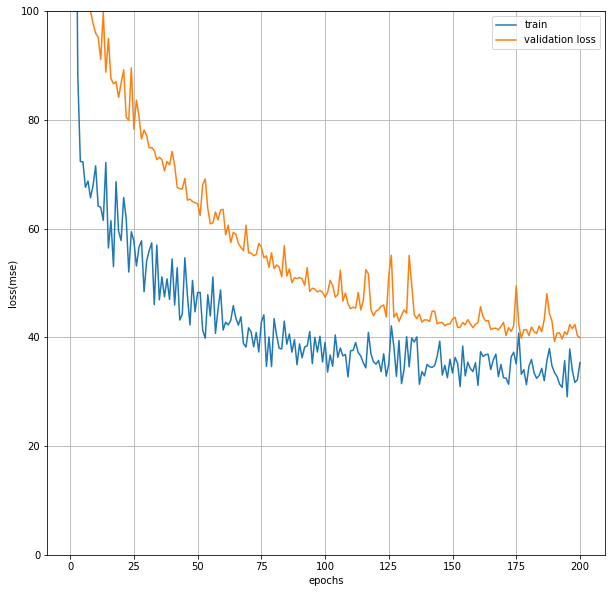

In [72]:
#epoch 당 loss와 val_loss 변화에 대해 선그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize= (10,10))

plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label = 'train')
plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label = 'validation loss')

plt.xlabel('epochs')
plt.ylabel('loss(mse)')
plt.legend()
plt.ylim(0,100)
plt.grid(True)
plt.show()

### Fashion MNIST(MNIST) Dataset - 다중분류

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

아래는 y 값 : 레이블 인코딩되어, 숫자로 되어있음
<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [1]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

In [3]:
#데이터셋 읽기 : tf의 토의데이터
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [6]:
np.unique(y_test, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

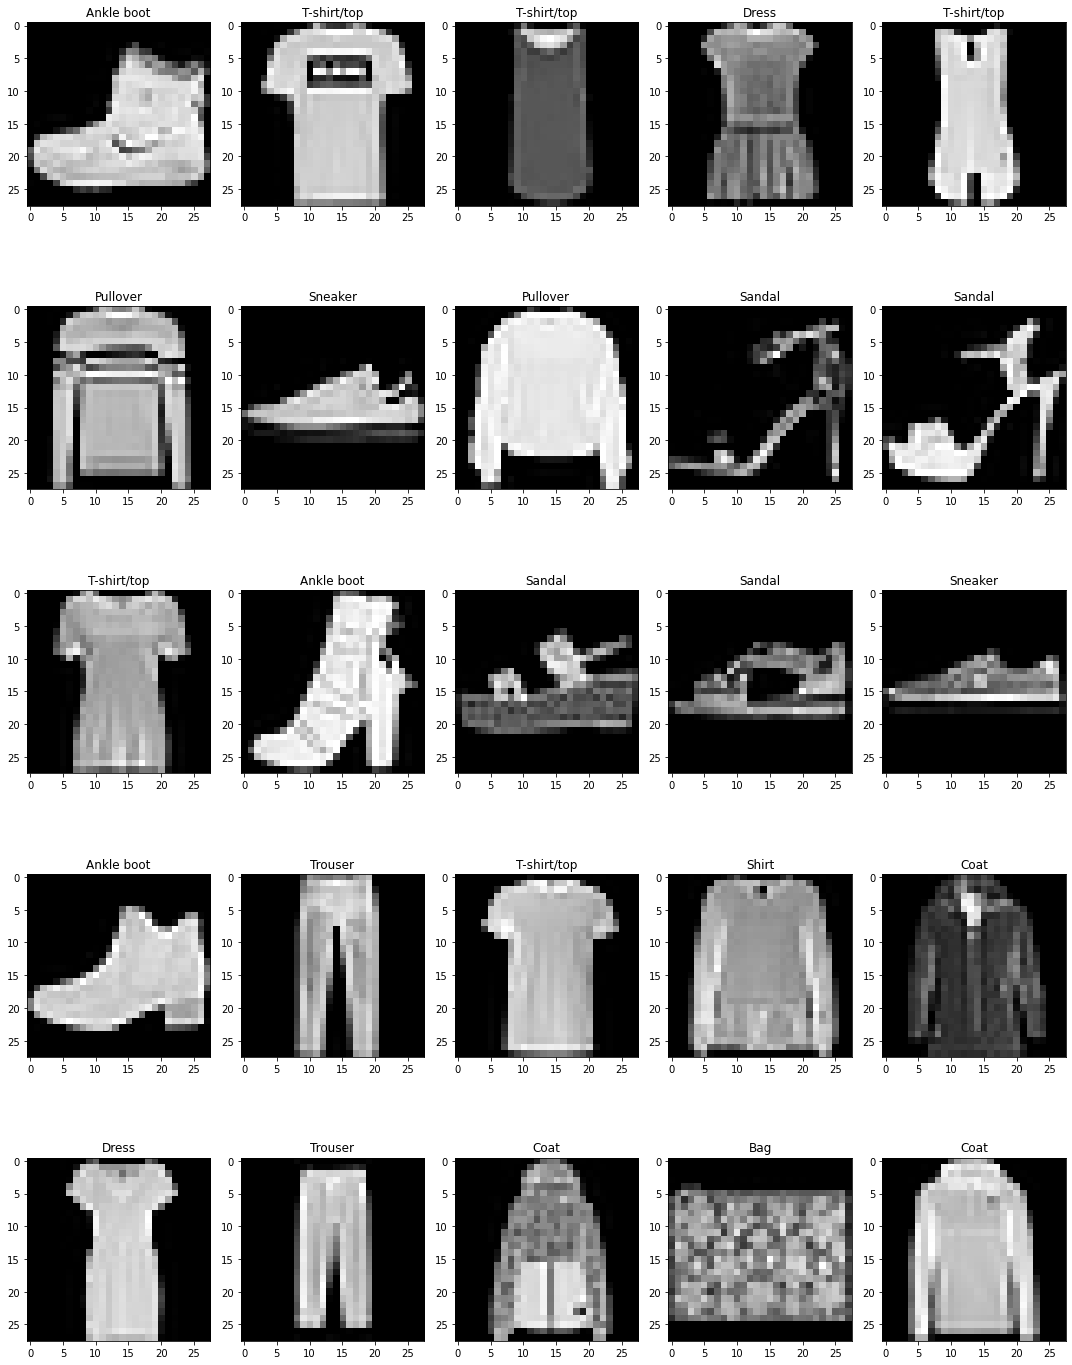

In [9]:
#이미지 확인
import matplotlib.pyplot as plt
plt.figure(figsize = (15,20))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap = 'gray') # 실제 흑백이미지
    plt.title(class_names[y_train[i]]) # 레이블인코딩 되어있는 것을 실제값으로 표현
    
plt.tight_layout()
plt.show()

In [11]:
class_names[y_train[0]]

'Ankle boot'

In [12]:
#1.데이터 전처리

#1-1. X- 이미지인데, 편차가 커서 0~1로 바꿔줌

X_train = X_train/255
X_test = X_test/255

#1-2. y : 라벨인코딩 되어있어-> 다중분류일때 원핫인코딩 해줘야
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)




In [13]:
np.max(X_train),np.min(X_test)

(1.0, 0.0)

In [14]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [16]:
#2.모델만들기
#2-1.하이퍼파라미터 설정

LEARNING_RATE = 0.001
N_EPOCHS = 50 #784개로 하나의 데이터도 크고, 얘는 60000개 데이터라 데이터 수도 많아서 에폭 수 줄임
N_BATCHS = 100

N_CLASS = 10 #클래스 카테고리의 수
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]# 트레인, 테스트 셋 데이터의 갯수
IMAGE_SIZE = 28 # 이미지 사이즈가 바뀌는건 아니라 그때그때 달라지지 않아서 꼭 이렇게는 안해도 됨


In [17]:
#3.데이터셋 생성
#3-1.트레인셋
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))\
                  .shuffle(N_TRAIN)\
                  .batch(N_BATCHS,drop_remainder = True)\
                  .repeat()

#3-2.테스트셋
val_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(N_BATCHS)

In [24]:
#2-2.모델 구현
def create_model():
    model = keras.Sequential()
    #입력층
    model.add(keras.layers.Input((28,28)))
    model.add(keras.layers.Flatten())
    #은닉층
    model.add(keras.layers.Dense(256, activation = 'relu'))
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dense(64, activation = 'relu'))
    #출력층: softmax - 각 클래스별 확률 나옴.
    model.add(keras.layers.Dense(10, activation= 'softmax'))
    
   #컴파일 : 다중분류일떄 loss -categorical_crossentropy or sparse_categorical_entropy 
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    
    return model
    

In [25]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


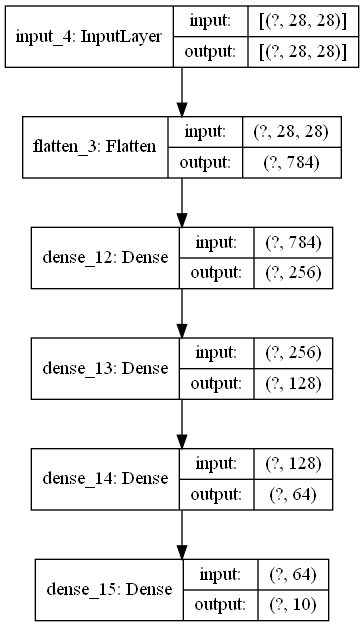

In [26]:
#도식화

from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'practice1.png', show_shapes = True)

In [28]:
#4. 학습
#4-1. 한 에폭당 스텝 수(업데이트 수) 계산
steps_per_epoch = N_TRAIN//N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

print(steps_per_epoch, validation_steps)

600 100


In [29]:
#4-2.히트소리 객체 생성 : train_dataset, val_dataset, epochs, steps_per_epoch, validation_steps 다섯개 주기
history = model.fit(train_dataset,
                   epochs = N_EPOCHS,
                   steps_per_epoch = steps_per_epoch,
                   validation_data = val_dataset,
                   validation_steps = validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/50
600/600 [==============================] - 4s 7ms/step - loss: 0.5103 - accuracy: 0.8201 - val_loss: 0.4214 - val_accuracy: 0.8469
Epoch 2/50
600/600 [==============================] - 3s 6ms/step - loss: 0.3652 - accuracy: 0.8657 - val_loss: 0.4112 - val_accuracy: 0.8528
Epoch 3/50
600/600 [==============================] - 3s 5ms/step - loss: 0.3260 - accuracy: 0.8805 - val_loss: 0.3670 - val_accuracy: 0.8679
Epoch 4/50
600/600 [==============================] - 3s 5ms/step - loss: 0.3037 - accuracy: 0.8888 - val_loss: 0.3470 - val_accuracy: 0.8742
Epoch 5/50
600/600 [==============================] - 3s 6ms/step - loss: 0.2848 - accuracy: 0.8929 - val_loss: 0.3424 - val_accuracy: 0.8751
Epoch 6/50
600/600 [==============================] - 3s 6ms/step - loss: 0.2730 - accuracy: 0.8974 - val_loss: 0.3432 - val_accuracy: 0.8773
Epoch 7/50
600/600 [==============================] - 3s 6ms/step - loss: 0.2574 - accuracy: 0.9024 - va

In [ ]:
# loss는 확률값 가지고 계산하는거라 정확도가 높아지는데 로스값도 높아지는 경우가 생길 수 있음
# 정확도는 1을 1로 맞췄는지만 보는거니까 

In [30]:
#5. 평가 : 테스트셋(마지막에 한번)
model.evaluate(val_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.8980


[0.5471461237967015, 0.898]

In [31]:
#결과 시각화
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

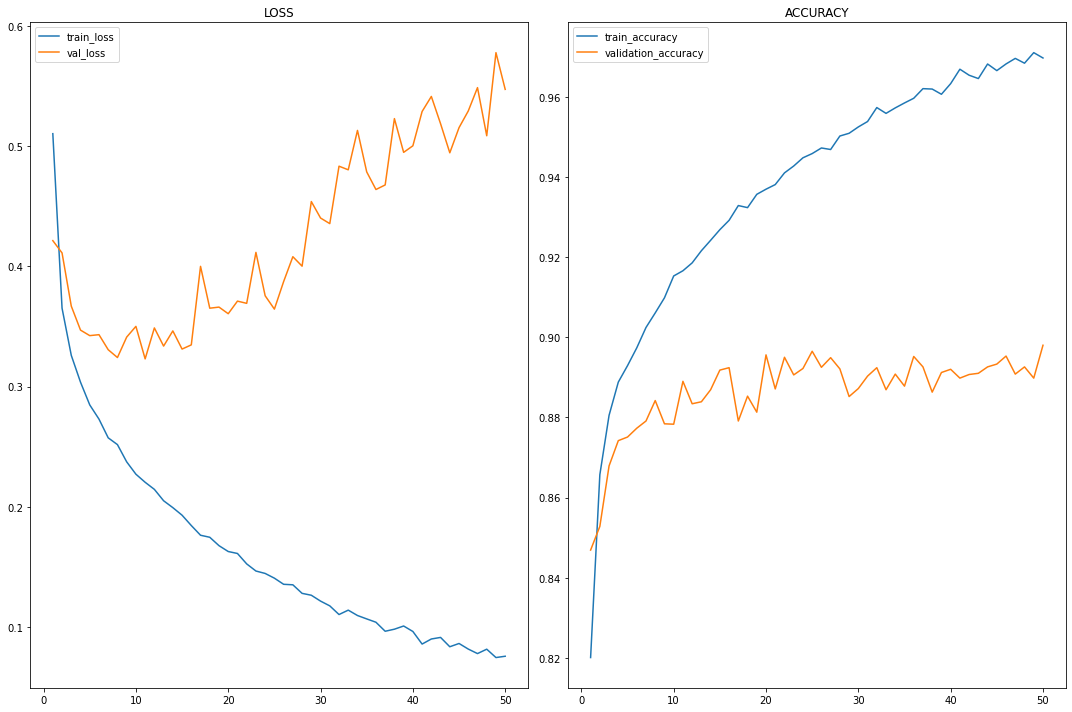

In [32]:
plt.figure(figsize=(15,10))


#처음- 에폭당 loss
plt.subplot(1,2,1)
plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label = 'train_loss')
plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label ='val_loss')
plt.legend()
plt.title('LOSS')

#두번째 플롯 : 에폭당 accuracy
plt.subplot(1,2,2)
plt.plot(range(1,N_EPOCHS+1), history.history['accuracy'],label = 'train_accuracy')
plt.plot(range(1,N_EPOCHS+1), history.history['val_accuracy'], label = 'validation_accuracy')
plt.title('ACCURACY')

plt.legend()
plt.tight_layout()
plt.show()